In [3]:
import pandas as pd

In [36]:
data01 = pd.read_csv('./assignment-2-data/20210301-0002_01.csv',skiprows=1)

In [37]:
data01.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.021008
std,2.886906,0.991540
min,0.000000,-3.016271
25%,2.500092,-0.722195
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.398591


In [42]:
data20 = pd.read_csv('./assignment-2-data/20210301-0002_20.csv',skiprows=1)

In [43]:
data02.describe()

,(ms),(V)
count,89290.000000,89290.000000
mean,5.000184,0.022741
std,2.886906,0.980590
min,0.000000,-2.888780
25%,2.500092,-0.679595
50%,5.000184,0.000000
75%,7.500276,0.722195
max,10.000368,3.441037


In [50]:
data30 = pd.read_csv('./assignment-2-data/20210301-0002_30.csv',skiprows=1,index_col=0)
data30.describe()

,(V)
count,89290.000000
mean,0.019101
std,0.981749
min,-2.846334
25%,-0.679595
50%,0.000000
75%,0.722195
max,3.738466


In [ ]:
Media varianza e dev std approssimativamente uguali 

array([[<AxesSubplot:title={'center':'(V)'}>]], dtype=object)

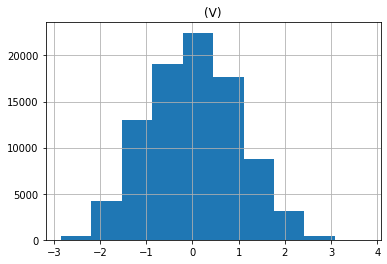

In [51]:
data30.hist()


<AxesSubplot:ylabel='Density'>

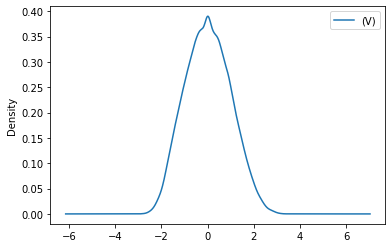

In [53]:
data30.plot(kind= 'density')

In [54]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
stat, p = normaltest(data30)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1345.652, p=0.000
Sample does not look Gaussian (reject H0)


Estimate PDF: https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/

Estimate spectral density: 
https://scipy-lectures.org/intro/scipy/auto_examples/plot_spectrogram.html
https://scipy-lectures.org/intro/scipy/auto_examples/plot_spectrogram.html



Estimate autocorrelation: https://stackoverflow.com/questions/14297012/estimate-autocorrelation-using-python
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf
